# Chemical Arithmetics
* notion of analog computation by stabilization of output species given initial concentration of input species
* sum with 3 reactions
* product with 2 reactions
* integration with 1 reaction

F. Fages, Feb. 2020, Feb 2021

# Sum: C = A + B
* inputs A, B
* used as catalysts to keep them unchanged
* output C

In [1]:
MA(ks1) for A => A+C.

In [2]:
MA(ks2) for B => B+C.

In [3]:
MA(ks3) for C => _.

In [4]:
parameter(ks1=1, ks2=1, ks3=1).

In [5]:
present(A, a). parameter(a=2).
present(B, b). parameter(b=3).

In [6]:
draw_reactions.

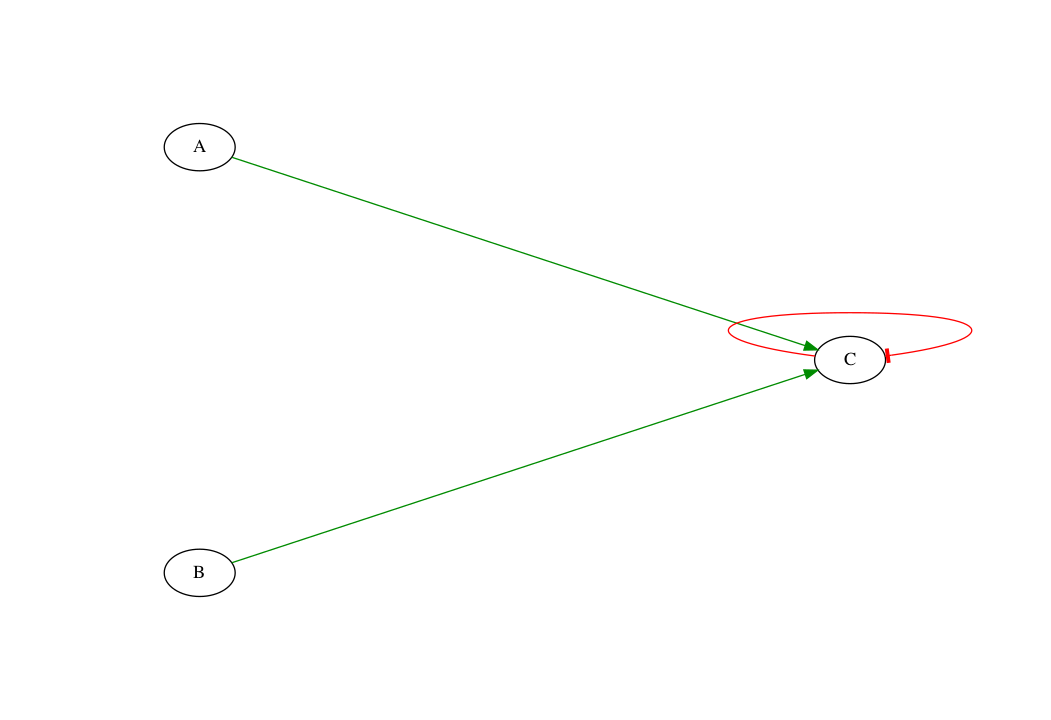

In [7]:
draw_influences.

In [8]:
list_model.

MA(ks1) for A=>A+C.
MA(ks2) for B=>B+C.
MA(ks3) for C=>_.
present(A,a).
present(B,b).
parameter(
  ks1 = 1,
  ks2 = 1,
  ks3 = 1,
  a = 2,
  b = 3
).


In [9]:
list_ode.

In [10]:
numerical_simulation. plot.

In [11]:
%slider a b

Box(children=(SelectionSlider(continuous_update=False, description='a', index=10, layout=Layout(min_width='300…

In [12]:
parameter(a=2, b=3).

## Extrinsic variability
* Robustness of the result with respect to parameter variation (by default 0.1, i.e. 10% each)
* Models intercellular variability 
* computed by sampling parameter values with normal distribution (30 samples by default) and simulation.

In [13]:
seed(0). robustness(F(G(C=v)), [ks1, ks2, ks3], [v -> 5]).

Time: 2.638 s
Robustness degree: 0.688508


In [14]:
seed(0). robustness(F(G(C=v)), [ks1, ks2, ks3], [v -> 5], robustness_coeff_var:0.2).

Time: 2.531 s
Robustness degree: 0.54375


In [15]:
seed(0). robustness(F(G(C=v)), [ks1, ks2, ks3], [v -> 5], robustness_coeff_var:0.3).

Time: 2.488 s
Robustness degree: 0.456343


## Stochastic semantics
* interpretation by continuous time Markov chain (CTMC)
* Stochastic simulation algorithm (SSA)
* numbers of molecules with conversion factor from concentration (100 by default) 
* the reaction rates give propensities to react and probabilities after normalization
* the time of next reaction is given by an exponential law

In [16]:
option(method:ssa, stochastic_conversion:100).
seed(0). numerical_simulation(method:ssa). plot.

In [17]:
option(stochastic_conversion:1). 
seed(0). numerical_simulation. plot.

In [18]:
validity_domain(F(G(C=n))).

n=7


In [19]:
satisfaction_degree(F(G(C=n)), [n -> 500]).

0.002024


## Intrinsic variability
* stochastic simulation (conversion ratio to molecule numbers is 100 per default)
* Robustness of the result with respect to the stochasticity of chemical reaction
* Models intracellular variability

In [20]:
option(stochastic_conversion:1). seed(0). robustness(F(G(C=n)), [], [n -> 5]).

Time: 7.202 s
Robustness degree: 0.5044443999999999


## Extrinsic and intrinsic variability combined
* Robustness of the result with respect to both stochasticity and parameter variation (by default 10% each)

In [21]:
seed(0). robustness(F(G(C=v)), [ks1, ks2, ks3], [v -> 5]).

Time: 8.418 s
Robustness degree: 0.4319372933333333


In [22]:
seed(0). robustness(F(G(C=v)), [ks1, ks2, ks3], [v -> 5], robustness_coeff_var:0.3).

Time: 7.269 s
Robustness degree: 0.3497455


# Product F = E * F

In [23]:
option(method:bsimp).

In [24]:
D+E => D+E+F.

In [25]:
F => _.

In [26]:
present(D,d). parameter(d=3). 
present(E,e). parameter(e=2).

In [27]:
draw_reactions.

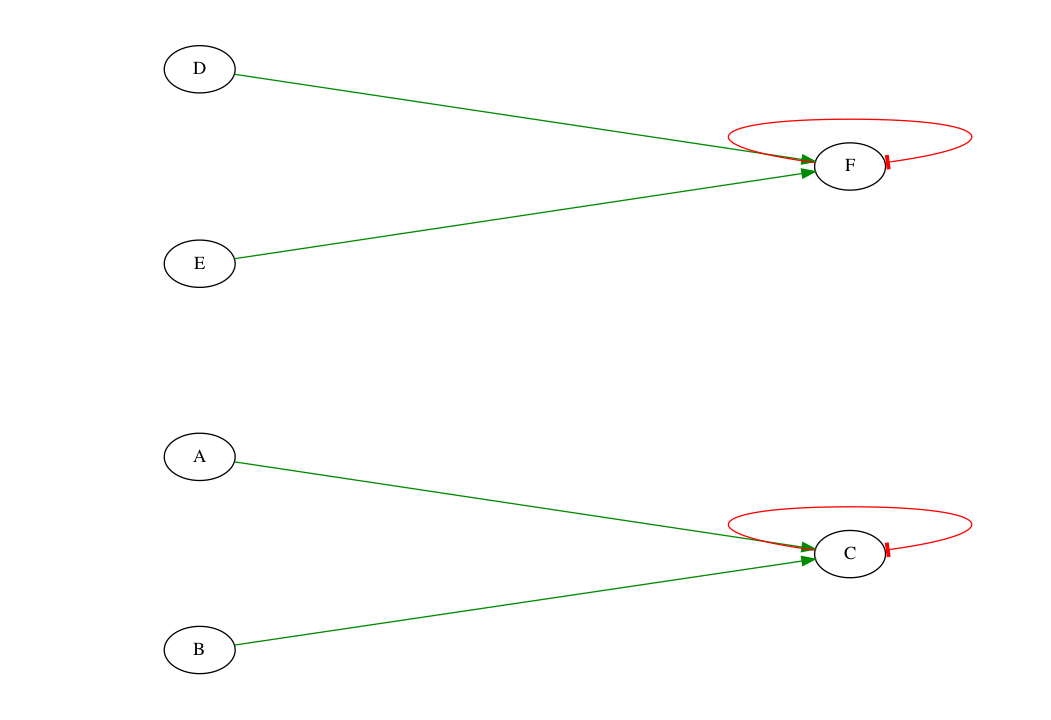

In [28]:
draw_influences.

In [29]:
list_ode.

In [30]:
option(show:{D,E,F}).
numerical_simulation. plot.

In [31]:
%slider d e

Box(children=(SelectionSlider(continuous_update=False, description='d', index=10, layout=Layout(min_width='300…

In [32]:
option(method:ssa, stochastic_conversion: 10). 
numerical_simulation. plot.

In [33]:
%slider d e

Box(children=(SelectionSlider(continuous_update=False, description='d', index=10, layout=Layout(min_width='300…

## Better product G = D * E
* minimize the difference of squares

In [34]:
2*D+2*E => 2*D+2*E+2*G.

In [35]:
2*G => _.

In [36]:
list_ode. 

In [37]:
option(method:bsimp). % ODE numerical integration by implicit method

In [38]:
option(show:{D, E, F, G}). numerical_simulation. plot.

In [39]:
%slider d e 

Box(children=(SelectionSlider(continuous_update=False, description='d', index=10, layout=Layout(min_width='300…

In [40]:
option(method:ssa). option(time:5).

In [41]:
%slider d e

Box(children=(SelectionSlider(continuous_update=False, description='d', index=10, layout=Layout(min_width='300…

# Integration I = $\int_0^t$ A dt

In [42]:
A => A+I.

In [43]:
option(method: bsimp). numerical_simulation.
option(show:{A,I}). plot.

In [44]:
%slider a

Box(children=(SelectionSlider(continuous_update=False, description='a', index=10, layout=Layout(min_width='300…

# Integration J = $\int_0^t\int_0^t$ A $dt^2$

In [45]:
I => I+J.

In [46]:
option(show:{A, I, J}). numerical_simulation. plot.

In [47]:
%slider a

Box(children=(SelectionSlider(continuous_update=False, description='a', index=10, layout=Layout(min_width='300…

In [48]:
option(method:ssa).

In [49]:
%slider a

Box(children=(SelectionSlider(continuous_update=False, description='a', index=10, layout=Layout(min_width='300…

# Questions 


In [50]:
clear_model. option(method:bsimp).

## 1) Give reactions to compute B = 2 * A + 1
* show the result with sliders for changing the value of x
* in both the differential semantics (ODE) and the stochastic semantics (SSA)

## 2) Give reactions to compute E = C - D
* represent a negative number X by a difference of concentrations X = Xp - Xm
* with an annihilation reaction Xp + Xm => _

## 3) Give one single reaction to compute F = min(G, H)
* this reaction may destroy its inputs

## 4) Show with sliders that the result is independent of the kinetic rate constant

## 5) Give reactions to compute L = min(I, min(J, K))
* show that the result is rate independent

## 6) Give rate-independent reactions to compute M = max (N, O)
* Hint: max(x, y) = x + y - min(x, y)

## 7) Do you have any idea why that CRN for max is rate-independent ?
* Hint: contemplate the reaction graph and see a funnel appear